### Analyzing Police Data from the Standford Open Policing Project Dataset: for the state of Rhode Island (RI)


Importing the csv file and exploring the dataset, to also count the number of missing values from various rows.

In [6]:
import pandas as pd
ri=pd.read_csv('police_data_RI.csv')
ri.head()

,raw_row_number,stop_date,stop_time,zone,driver_race,driver_sex,department_id,type,is_arrested,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,driver_gender,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [7]:
# Count the number of missing values in each column
ri.isnull().sum()

raw_row_number                0
stop_date                    10
stop_time                    10
zone                         10
driver_race               29073
driver_sex                29097
department_id                10
type                          0
is_arrested               29073
citation_issued           29073
warning_issued            29073
stop_outcome              35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
driver_gender             29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [9]:
ri.drop(['raw_SearchResultOne','raw_SearchResultTwo','raw_SearchResultThree','raw_row_number','raw_OperatorRace','driver_sex','vehicle_make','vehicle_model'],axis='columns', inplace=True)

In [10]:
ri.shape


(509681, 23)

In [11]:
ri.isnull().sum()

stop_date                 10
stop_time                 10
zone                      10
driver_race            29073
department_id             10
type                       0
is_arrested            29073
citation_issued        29073
warning_issued         29073
stop_outcome           35841
contraband_found      491919
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
contraband_other      491919
frisk_performed           10
search_conducted           0
search_basis          491919
reason_for_search     491919
reason_for_stop        29073
raw_BasisForStop       29073
driver_gender          29073
raw_ResultOfStop       29073
dtype: int64

In [13]:
#removing all the rows in which the driver gender is unspecified/missing
ri.dropna(subset=['driver_gender'],inplace=True)
ri.shape

(480608, 23)

In [18]:
#checking the datatypes of all the values in the dataframe to ensure they are in the correct format
ri.dtypes

stop_date             object
stop_time             object
zone                  object
driver_race           object
department_id         object
type                  object
is_arrested           object
citation_issued       object
warning_issued        object
stop_outcome          object
contraband_found      object
contraband_drugs      object
contraband_weapons    object
contraband_alcohol    object
contraband_other      object
frisk_performed       object
search_conducted        bool
search_basis          object
reason_for_search     object
reason_for_stop       object
raw_BasisForStop      object
driver_gender         object
raw_ResultOfStop      object
dtype: object

From the above datatypes description we can see that <br>
1. The is_arrested column should have a 'bool' datatype instead of 'object' datatype
2. The date and time columns should have datetime datatype for performing operations hindered under the 'object' datatype values
3. The gender should be a categorical variable

In [19]:
#check datatype of is_arrested column
ri.is_arrested.head()

0    False
1    False
2    False
3    False
4    False
Name: is_arrested, dtype: object

As it is of 'object' datatype but the values are of boolean datatype, we will perform datatype conversion on the is_arrested column

In [20]:
ri['is_arrested'] = ri.is_arrested.astype('bool')

#check the dtype now
ri.is_arrested.dtypes

dtype('bool')

The is_arrested column has been converted.<br>
Now, it is time to work on the date and time columns. The two columns will be combined using string operations and then converted to a datetime format in another column 'stop_datetime'. Thi scolumn will then be made as the index of the dataframe to better acces the entries and plotting of the data.

In [22]:
combined= ri.stop_date.str.cat(ri.stop_time, sep=" ")
ri['stop_datetime']= pd.to_datetime(combined)

#check dtypes of ri dataframe
print(ri.dtypes)

stop_date                     object
stop_time                     object
zone                          object
driver_race                   object
department_id                 object
type                          object
is_arrested                     bool
citation_issued               object
warning_issued                object
stop_outcome                  object
contraband_found              object
contraband_drugs              object
contraband_weapons            object
contraband_alcohol            object
contraband_other              object
frisk_performed               object
search_conducted                bool
search_basis                  object
reason_for_search             object
reason_for_stop               object
raw_BasisForStop              object
driver_gender                 object
raw_ResultOfStop              object
stop_datetime         datetime64[ns]
dtype: object


As we can see the stop_datetime column has been added in the last as datetime64 datatype. Examine this column and then set it as the index.

In [24]:
ri['stop_datetime'].head()
ri.set_index(['stop_datetime'], inplace=True)
#DO NOT RUN THIS BLOCK OR ANY ABOVE IT AGAIN

0   2005-11-22 11:15:00
1   2005-01-10 12:20:00
2   2005-01-10 12:30:00
3   2005-01-10 12:50:00
4   2005-01-10 13:10:00
Name: stop_datetime, dtype: datetime64[ns]

In [30]:
print(ri.index)
print(ri.columns)

DatetimeIndex(['2005-11-22 11:15:00', '2005-01-10 12:20:00',
               '2005-01-10 12:30:00', '2005-01-10 12:50:00',
               '2005-01-10 13:10:00', '2005-01-10 15:50:00',
               '2005-11-09 11:45:00', '2005-11-09 11:45:00',
               '2005-04-10 11:55:00', '2005-04-10 11:55:00',
               ...
               '2015-12-29 13:28:00', '2015-12-27 12:45:00',
               '2015-12-27 13:43:00', '2015-12-28 02:29:00',
               '2015-12-30 11:42:00', '2015-08-16 13:37:00',
               '2015-04-08 10:40:00', '2015-12-20 11:17:00',
               '2015-09-11 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480608, freq=None)
Index(['stop_date', 'stop_time', 'zone', 'driver_race', 'department_id',
       'type', 'is_arrested', 'citation_issued', 'warning_issued',
       'stop_outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'fr

let's rename the column 'reason_stop' to 'violation' and check for unique values

In [31]:
ri.rename(columns={'reason_for_stop':'violation'}, inplace=True)
print(ri.columns)

Index(['stop_date', 'stop_time', 'zone', 'driver_race', 'department_id',
       'type', 'is_arrested', 'citation_issued', 'warning_issued',
       'stop_outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'violation', 'raw_BasisForStop', 'driver_gender',
       'raw_ResultOfStop'],
      dtype='object')


In [32]:
#Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: violation, dtype: int64
Speeding                            0.559175
Other Traffic Violation             0.187750
Equipment/Inspection Violation      0.127447
Registration Violation              0.041260
Seatbelt Violation                  0.033972
Special Detail/Directed Patrol      0.028385
Call for Service                    0.015832
Violation of City/Town Ordinance    0.002156
Motorist Assist/Courtesy            0.002060
APB                                 0.001009
Susp

In [33]:
#COMPARING VIOLATIONS BY GENDER

female=ri[ri.driver_gender=='F']
male=ri[ri.driver_gender=='M']

In [35]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB                                 0.000831
Suspicious Person                   0.000564
Warrant                             0.000206
Name: violation, dtype: float64
Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB                    

From the above figures, it can be said that female drivers have more violations for speeding over male drivers.

###### Does gender affect who gets a ticket for speeding?

We will be exploring the relationships between the gender an dvarious outcomes under violations to better answer any questions that may arise. We are simply trying to find correlations by adding multiple conditions.

In [36]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

citation    0.954609
warning     0.039059
arrest      0.006332
Name: stop_outcome, dtype: float64
citation    0.946763
warning     0.036167
arrest      0.017070
Name: stop_outcome, dtype: float64


Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

###### Does gender affect whose vehicle is searched?

In [37]:
#Calculating the search rate

# Check the data type of 'search_conducted'
print(ri.search_conducted.dtypes)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963043
True     0.036957
Name: search_conducted, dtype: float64
0.03695735401824356


The mean of search_conducted should and is matching the True values for search_conducted.
<br> From the results, it can be seen that the search rate is almost 3.7%

In [38]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

0.018751239152648355


In [39]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

0.04379217389811301


In [40]:
# Calculate the search rate for both groups simultaneously (It should match the previous results.)
print(ri.groupby(ri.driver_gender).search_conducted.mean())

driver_gender
F    0.018751
M    0.043792
N    0.000000
U    0.000000
Name: search_conducted, dtype: float64


Male drivers are searched more than twice as often as female drivers.

###### Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.<br>

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.<br>

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

In [42]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation                       
F              APB                                 0.165138
               Call for Service                    0.042230
               Equipment/Inspection Violation      0.040245
               Motorist Assist/Courtesy            0.033133
               Other Traffic Violation             0.038021
               Registration Violation              0.054700
               Seatbelt Violation                  0.017746
               Special Detail/Directed Patrol      0.018045
               Speeding                            0.007738
               Suspicious Person                   0.216216
               Violation of City/Town Ordinance    0.060185
               Warrant                             0.148148
M              APB                                 0.255319
               Call for Service                    0.092419
               Equipment/Inspection Violation      0.070916
               Motorist Assist/Courtesy            0

In [43]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation                         driver_gender
APB                               F                0.165138
                                  M                0.255319
Call for Service                  F                0.042230
                                  M                0.092419
                                  N                0.000000
                                  U                0.000000
Equipment/Inspection Violation    F                0.040245
                                  M                0.070916
                                  U                0.000000
Motorist Assist/Courtesy          F                0.033133
                                  M                0.089802
                                  U                0.000000
Other Traffic Violation           F                0.038021
                                  M                0.059156
                                  U                0.000000
Registration Violation            F                0

###### Does gender affect who is frisked during a search?

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."
We'll first check if "Protective Frisk" was the only search type and then, using the string mehtod we will locate all instances in which the driver was frisked

In [48]:
# Count the 'search_type' values
print(ri.reason_for_search.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.reason_for_search.str.contains('Terry Frisk', na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtypes)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                               6998
Probable Cause                                                   2063
Odor of Drugs/Alcohol                                            1872
Reasonable Suspicion                                             1141
Inventory/Tow                                                    1101
Terry Frisk                                                       879
Incident to Arrest|Inventory/Tow                                  582
Plain View                                                        425
Odor of Drugs/Alcohol|Probable Cause                              153
Probable Cause|Odor of Drugs/Alcohol                              145
Incident to Arrest|Odor of Drugs/Alcohol                          123
Incident to Arrest|Terry Frisk                                    102
Incident to Arrest|Probable Cause                                 100
Odor of Drugs/Alcohol|Incident to Arrest                           96
Odor of Drugs/Alcoho

In [49]:
#Comparing frisk rates by gender

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())


0.08996734601959239
driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64


The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

###### Does time of day affect arrest date?

It is easier to analyze this using plots rather than figures. 

First, we'll calculate the arrest rate across all stops. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight<br>
12 = noon<br>
23 = 11 PM<br>

In [50]:
#Calculating the hourly arrest rate


# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.034545825287968575
stop_datetime
0     0.052142
1     0.067121
2     0.061063
3     0.052604
4     0.053897
5     0.032657
6     0.012948
7     0.013829
8     0.019714
9     0.024698
10    0.025582
11    0.027078
12    0.031359
13    0.030248
14    0.031529
15    0.032124
16    0.033519
17    0.038989
18    0.039898
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045084
Name: is_arrested, dtype: float64


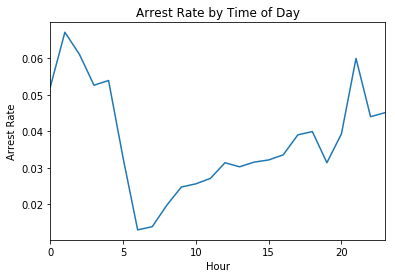

In [52]:
#Plotting the hourly arrest rate

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(kind='line')

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

###### What violations are caught in each zone?

###### Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. <br>
We'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, we'll filter the table to focus on the "K" zones.

In [81]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.zone, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.zone, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['K1':'K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['K1':'K3']

violation  APB  Call for Service  Equipment/Inspection Violation  \
zone                                                               
K1          32               282                            3788   
K2         101              1036                           11285   
K3         144              1230                           12959   
X1           6               198                            1725   
X3          64              1328                           11520   
X4         138              3535                           19975   

violation  Motorist Assist/Courtesy  Other Traffic Violation  \
zone                                                           
K1                               78                     7130   
K2                              118                    16440   
K3                              258                    16218   
X1                               33                     3711   
X3                              324                    17179   
X4     

###### Plotting violations by district
We've created a frequency table focused on the "K" zones, and will visualize the data to compare what violations are being caught in each zone.

We'll create a bar plot, which is an appropriate plot type since we're comparing categorical data. Then we'll also create a stacked bar plot in order to get a slightly different look at the data.

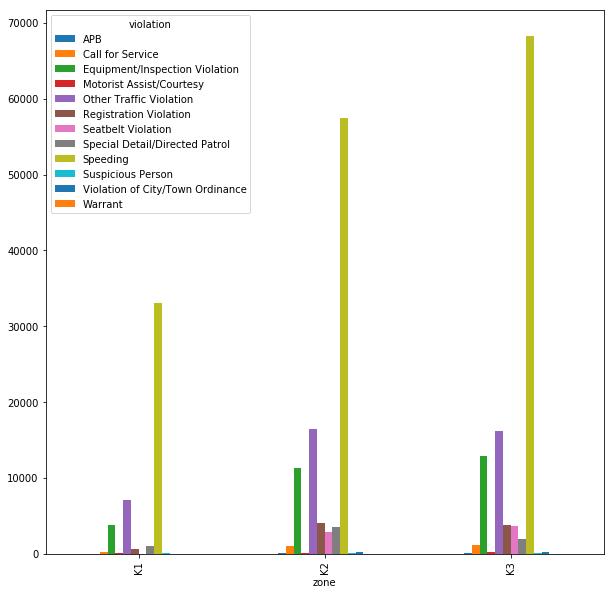

In [89]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar',figsize=(10,10))

# Display the plot
plt.show()

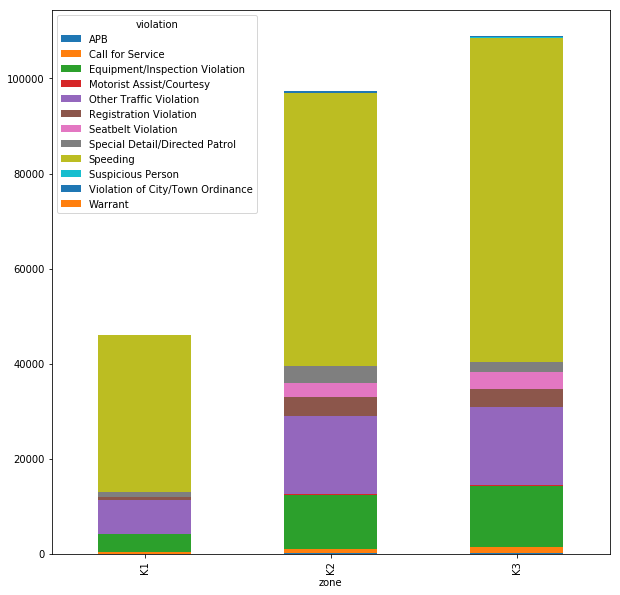

In [90]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True,figsize=(10,10))

# Display the plot
plt.show()

The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.